In [13]:
import os
import re
import pandas as pd
import numpy as np

# Collect all the info (GB and VB)

In [14]:
fnames = os.listdir('dataset_GB')
info_fnames_gb = [fname for fname in fnames if '-info' in fname]

In [15]:
info_fnames_gb

['AAPL-info.csv',
 'ADI-info.csv',
 'ADX-info.csv',
 'AES-info.csv',
 'AGR-info.csv',
 'AILLP-info.csv',
 'ALCO-info.csv',
 'AY-info.csv',
 'BIP-info.csv',
 'CEN-info.csv',
 'D-info.csv',
 'DAN-info.csv',
 'DG-info.csv',
 'EA-info.csv',
 'EAST-info.csv',
 'ENPH-info.csv',
 'EVK-info.csv',
 'EVN-info.csv',
 'F-info.csv',
 'GET-info.csv',
 'GPJA-info.csv',
 'GRN-info.csv',
 'ICAD-info.csv',
 'JCI-info.csv',
 'MAG-info.csv',
 'MAXN-info.csv',
 'MP-info.csv',
 'MU-info.csv',
 'NSARO-info.csv',
 'NSC-info.csv',
 'NYF-info.csv',
 'OC-info.csv',
 'PEP-info.csv',
 'PFE-info.csv',
 'PPWLO-info.csv',
 'REGI-info.csv',
 'SALM-info.csv',
 'SRG-info.csv',
 'SU-info.csv',
 'TIGO-info.csv',
 'TRN-info.csv',
 'TTE-info.csv',
 'UELMO-info.csv',
 'VFC-info.csv',
 'VOD-info.csv',
 'VST-info.csv',
 'VZ-info.csv',
 'WMT-info.csv',
 'WOW-info.csv',
 'XYL-info.csv']

In [16]:
df_info_gb = pd.DataFrame()
for info_fname in info_fnames_gb:
    df = pd.read_csv(f'dataset_GB/{info_fname}')
    
    if df.shape[0] > 1:
        df = df.iloc[:1, :]
        
    ticker = info_fname.split('-')[0]
    df.index = [ticker]
    df_info_gb = pd.concat((df_info_gb, df))

In [17]:
df_info_gb

,Exchange Ticker,"ROA Total Assets, Percent",Return On Equity - Actual,Total Debt,"Total Assets, Reported",Operating Income,TRBC Industry Group Name,TRBC Industry Name,Long Term Debt,Region of Headquarters
AAPL,AAPL,28.057906,147.439,126000000000.0,351000000000.0,109000000000.0,"Computers, Phones & Household Electronics",Phones & Handheld Devices,109000000000.0,Americas
ADI,ADI,3.768558,10.369,6769875000.0,52322071000.0,1477051000.0,Semiconductors & Semiconductor Equipment,Semiconductors,6253212000.0,Americas
ADX,ADX,3.141287,19.88,797261846.6,1400361505.0,57418172.94,Multiline Utilities,Multiline Utilities,553812896.9,Europe
AES,AES,0.797058,44.299,19881000000.0,34603000000.0,1405000000.0,Electric Utilities & IPPs,Electric Utilities,18374000000.0,Americas
AGR,AGR,1.492723,4.11,11197000000.0,37823000000.0,869000000.0,Electric Utilities & IPPs,Electric Utilities,10478000000.0,Americas
AILLP,AILLP,2.970451,NaN,3965000000.0,13535000000.0,602000000.0,Electric Utilities & IPPs,Electric Utilities,3946000000.0,Americas
ALCO,ALCO,4.97256,0.035,255451364.7,573780526.3,19544872.94,Real Estate Operations,"Real Estate Rental, Development & Operations",61623134.76,Asia
AY,AY,0.1722,2.319,6231339000.0,9938354000.0,373051000.0,Electric Utilities & IPPs,Electric Utilities,5895345000.0,Europe
BIP,BIP,1.536905,2.48,27001000000.0,61331000000.0,2025000000.0,Consumer Goods Conglomerates,Consumer Goods Conglomerates,21647000000.0,Americas
CEN,CEN,3.768642,6.741,597661022.9,3510560307.0,182230755.8,Electric Utilities & IPPs,Electric Utilities,483854075.8,Oceania


In [18]:
df_info_gb.shape

(50, 10)

In [19]:
df_info_vb = pd.read_csv('dataset_VB_info_clean.csv', index_col=0)

In [20]:
df_info_vb

,Exchange Ticker,"ROA Total Assets, Percent",Return On Equity - Actual,Total Debt,"Total Assets, Reported",Operating Income,TRBC Industry Group Name,TRBC Industry Name,Long Term Debt,Region of Headquarters
A,A,11.902420,25.960,2.729000e+09,1.070500e+10,1.347000e+09,Healthcare Equipment & Supplies,Advanced Medical Equipment & Technology,2.729000e+09,Americas
AAL,AAL,-3.103153,75.950,3.806000e+10,6.644200e+10,-1.059000e+09,Passenger Transportation Services,Airlines,3.557100e+10,Americas
AAOI,AAOI,-12.336460,-7.259,1.459830e+08,4.808050e+08,-4.884200e+07,Electronic Equipment & Parts,Electronic Equipment & Parts,9.175800e+07,Americas
AAP,AAP,4.270769,16.520,1.032984e+09,1.183964e+10,7.018850e+08,Specialty Retailers,"Auto Vehicles, Parts & Service Retailers",1.032984e+09,Americas
AAWW,AAWW,6.312596,18.700,2.319141e+09,6.029188e+09,4.946870e+08,Freight & Logistics Services,"Courier, Postal, Air Freight & Land-based Logi...",1.991469e+09,Americas
...,...,...,...,...,...,...,...,...,...,...
ZEN,ZEN,-11.883761,14.160,1.067964e+09,2.157279e+09,-1.818490e+08,Software & IT Services,Software,9.355760e+08,Americas
ZG,ZG,-2.380800,2.530,2.283732e+09,7.486560e+09,-3.994000e+07,Real Estate Operations,Real Estate Services,1.613523e+09,Americas
ZNGA,ZNGA,-8.703659,14.640,1.289900e+09,6.206500e+09,-3.702000e+08,Software & IT Services,Online Services,1.289900e+09,Americas
ZS,ZS,-12.809743,14.929,9.135380e+08,2.257631e+09,-2.078120e+08,Software & IT Services,Software,9.135380e+08,Americas


In [23]:
# label GB and VB before merging
df_info_gb['bond_type'] = 'GB'
df_info_vb['bond_type'] = 'VB'

In [24]:
# merge
df_info = pd.concat((df_info_gb, df_info_vb)).iloc[:, 1:]
df_info

,"ROA Total Assets, Percent",Return On Equity - Actual,Total Debt,"Total Assets, Reported",Operating Income,TRBC Industry Group Name,TRBC Industry Name,Long Term Debt,Region of Headquarters,bond_type
AAPL,28.057906,147.439,126000000000.0,351000000000.0,109000000000.0,"Computers, Phones & Household Electronics",Phones & Handheld Devices,109000000000.0,Americas,GB
ADI,3.768558,10.369,6769875000.0,52322071000.0,1477051000.0,Semiconductors & Semiconductor Equipment,Semiconductors,6253212000.0,Americas,GB
ADX,3.141287,19.88,797261846.6,1400361505.0,57418172.94,Multiline Utilities,Multiline Utilities,553812896.9,Europe,GB
AES,0.797058,44.299,19881000000.0,34603000000.0,1405000000.0,Electric Utilities & IPPs,Electric Utilities,18374000000.0,Americas,GB
AGR,1.492723,4.11,11197000000.0,37823000000.0,869000000.0,Electric Utilities & IPPs,Electric Utilities,10478000000.0,Americas,GB
...,...,...,...,...,...,...,...,...,...,...
ZEN,-11.883761,14.16,1067964000.0,2157279000.0,-181849000.0,Software & IT Services,Software,935576000.0,Americas,VB
ZG,-2.3808,2.53,2283732000.0,7486560000.0,-39940000.0,Real Estate Operations,Real Estate Services,1613523000.0,Americas,VB
ZNGA,-8.703659,14.64,1289900000.0,6206500000.0,-370200000.0,Software & IT Services,Online Services,1289900000.0,Americas,VB
ZS,-12.809743,14.929,913538000.0,2257631000.0,-207812000.0,Software & IT Services,Software,913538000.0,Americas,VB


In [25]:
df_info['ROA Total Assets, Percent'] = df_info['ROA Total Assets, Percent'].astype(float)
df_info['Return On Equity - Actual'] = df_info['Return On Equity - Actual'].astype(float)

df_info['Total Debt'] = df_info['Total Debt'].astype(float)
df_info['Total Assets, Reported'] = df_info['Total Assets, Reported'].astype(float)
df_info['Operating Income'] = df_info['Operating Income'].astype(float)
df_info['TRBC Industry Group Name'] = df_info['TRBC Industry Group Name'].astype(str)
df_info['TRBC Industry Name'] = df_info['TRBC Industry Name'].astype(str)
df_info['Long Term Debt'] = df_info['Long Term Debt'].astype(float)
df_info['Region of Headquarters'] = df_info['Region of Headquarters'].astype(str)
df_info['bond_type'] = df_info['bond_type'].astype(str)

In [26]:
df_info

,"ROA Total Assets, Percent",Return On Equity - Actual,Total Debt,"Total Assets, Reported",Operating Income,TRBC Industry Group Name,TRBC Industry Name,Long Term Debt,Region of Headquarters,bond_type
AAPL,28.057906,147.439,1.260000e+11,3.510000e+11,1.090000e+11,"Computers, Phones & Household Electronics",Phones & Handheld Devices,1.090000e+11,Americas,GB
ADI,3.768558,10.369,6.769875e+09,5.232207e+10,1.477051e+09,Semiconductors & Semiconductor Equipment,Semiconductors,6.253212e+09,Americas,GB
ADX,3.141287,19.880,7.972618e+08,1.400362e+09,5.741817e+07,Multiline Utilities,Multiline Utilities,5.538129e+08,Europe,GB
AES,0.797058,44.299,1.988100e+10,3.460300e+10,1.405000e+09,Electric Utilities & IPPs,Electric Utilities,1.837400e+10,Americas,GB
AGR,1.492723,4.110,1.119700e+10,3.782300e+10,8.690000e+08,Electric Utilities & IPPs,Electric Utilities,1.047800e+10,Americas,GB
...,...,...,...,...,...,...,...,...,...,...
ZEN,-11.883761,14.160,1.067964e+09,2.157279e+09,-1.818490e+08,Software & IT Services,Software,9.355760e+08,Americas,VB
ZG,-2.380800,2.530,2.283732e+09,7.486560e+09,-3.994000e+07,Real Estate Operations,Real Estate Services,1.613523e+09,Americas,VB
ZNGA,-8.703659,14.640,1.289900e+09,6.206500e+09,-3.702000e+08,Software & IT Services,Online Services,1.289900e+09,Americas,VB
ZS,-12.809743,14.929,9.135380e+08,2.257631e+09,-2.078120e+08,Software & IT Services,Software,9.135380e+08,Americas,VB


In [27]:
df_info.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1001 entries, AAPL to ZTS
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ROA Total Assets, Percent  998 non-null    float64
 1   Return On Equity - Actual  991 non-null    float64
 2   Total Debt                 1000 non-null   float64
 3   Total Assets, Reported     1000 non-null   float64
 4   Operating Income           1000 non-null   float64
 5   TRBC Industry Group Name   1001 non-null   object 
 6   TRBC Industry Name         1001 non-null   object 
 7   Long Term Debt             1000 non-null   float64
 8   Region of Headquarters     1001 non-null   object 
 9   bond_type                  1001 non-null   object 
dtypes: float64(6), object(4)
memory usage: 86.0+ KB


In [28]:
df_info_dummy = pd.get_dummies(df_info)
df_info_dummy

,"ROA Total Assets, Percent",Return On Equity - Actual,Total Debt,"Total Assets, Reported",Operating Income,Long Term Debt,TRBC Industry Group Name_Aerospace & Defense,TRBC Industry Group Name_Automobiles & Auto Parts,TRBC Industry Group Name_Banking Services,TRBC Industry Group Name_Beverages,...,TRBC Industry Name_Uranium,TRBC Industry Name_Water & Related Utilities,TRBC Industry Name_Wireless Telecommunications Services,Region of Headquarters_Africa,Region of Headquarters_Americas,Region of Headquarters_Asia,Region of Headquarters_Europe,Region of Headquarters_Oceania,bond_type_GB,bond_type_VB
AAPL,28.057906,147.439,1.260000e+11,3.510000e+11,1.090000e+11,1.090000e+11,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
ADI,3.768558,10.369,6.769875e+09,5.232207e+10,1.477051e+09,6.253212e+09,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
ADX,3.141287,19.880,7.972618e+08,1.400362e+09,5.741817e+07,5.538129e+08,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
AES,0.797058,44.299,1.988100e+10,3.460300e+10,1.405000e+09,1.837400e+10,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
AGR,1.492723,4.110,1.119700e+10,3.782300e+10,8.690000e+08,1.047800e+10,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZEN,-11.883761,14.160,1.067964e+09,2.157279e+09,-1.818490e+08,9.355760e+08,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
ZG,-2.380800,2.530,2.283732e+09,7.486560e+09,-3.994000e+07,1.613523e+09,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
ZNGA,-8.703659,14.640,1.289900e+09,6.206500e+09,-3.702000e+08,1.289900e+09,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
ZS,-12.809743,14.929,9.135380e+08,2.257631e+09,-2.078120e+08,9.135380e+08,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [32]:
df_info_dummy = df_info_dummy.drop(['bond_type_GB', 'bond_type_VB'], axis=1)
df_info_dummy['bond_type'] = df_info['bond_type']

In [33]:
df_info_dummy

,"ROA Total Assets, Percent",Return On Equity - Actual,Total Debt,"Total Assets, Reported",Operating Income,Long Term Debt,TRBC Industry Group Name_Aerospace & Defense,TRBC Industry Group Name_Automobiles & Auto Parts,TRBC Industry Group Name_Banking Services,TRBC Industry Group Name_Beverages,...,TRBC Industry Name_Toys & Children's Products,TRBC Industry Name_Uranium,TRBC Industry Name_Water & Related Utilities,TRBC Industry Name_Wireless Telecommunications Services,Region of Headquarters_Africa,Region of Headquarters_Americas,Region of Headquarters_Asia,Region of Headquarters_Europe,Region of Headquarters_Oceania,bond_type
AAPL,28.057906,147.439,1.260000e+11,3.510000e+11,1.090000e+11,1.090000e+11,0,0,0,0,...,0,0,0,0,0,1,0,0,0,GB
ADI,3.768558,10.369,6.769875e+09,5.232207e+10,1.477051e+09,6.253212e+09,0,0,0,0,...,0,0,0,0,0,1,0,0,0,GB
ADX,3.141287,19.880,7.972618e+08,1.400362e+09,5.741817e+07,5.538129e+08,0,0,0,0,...,0,0,0,0,0,0,0,1,0,GB
AES,0.797058,44.299,1.988100e+10,3.460300e+10,1.405000e+09,1.837400e+10,0,0,0,0,...,0,0,0,0,0,1,0,0,0,GB
AGR,1.492723,4.110,1.119700e+10,3.782300e+10,8.690000e+08,1.047800e+10,0,0,0,0,...,0,0,0,0,0,1,0,0,0,GB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZEN,-11.883761,14.160,1.067964e+09,2.157279e+09,-1.818490e+08,9.355760e+08,0,0,0,0,...,0,0,0,0,0,1,0,0,0,VB
ZG,-2.380800,2.530,2.283732e+09,7.486560e+09,-3.994000e+07,1.613523e+09,0,0,0,0,...,0,0,0,0,0,1,0,0,0,VB
ZNGA,-8.703659,14.640,1.289900e+09,6.206500e+09,-3.702000e+08,1.289900e+09,0,0,0,0,...,0,0,0,0,0,1,0,0,0,VB
ZS,-12.809743,14.929,9.135380e+08,2.257631e+09,-2.078120e+08,9.135380e+08,0,0,0,0,...,0,0,0,0,0,1,0,0,0,VB


In [40]:
df_info_dummy.to_csv('info_GBVB_clean.csv')

---

# Exp

In [94]:
import matplotlib.pyplot as plt

In [86]:
dirname = 'dataset_VB'

fnames = os.listdir(dirname)
tickers = [fname.split('-')[0] for fname in fnames]
tickers = list(set(tickers))

In [87]:
for ticker in tickers:
    df = pd.read_csv(f'{dirname}/{ticker}-ts.csv')
    print(df.shape)

(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(304, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(698, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(729, 8)
(757, 8)
(758, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(0, 7)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(199, 8)
(75

(757, 8)
(568, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(741, 8)
(757, 8)
(639, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(348, 8)
(757, 8)
(757, 8)
(0, 7)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(0, 7)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(672, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(131, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(0, 7)
(757, 8)
(0, 7)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(757, 8)
(22, 8)
(757, 8)
(757, 8)
(0, 7)
(757, 8)
(0, 7)
(757,

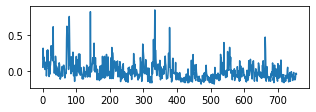

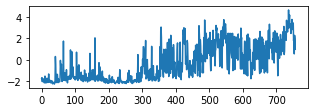

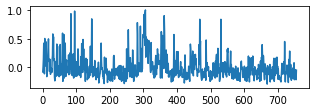

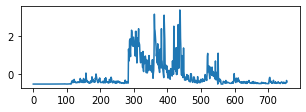

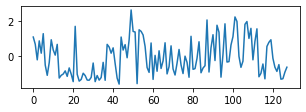

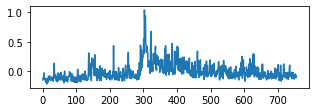

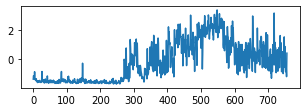

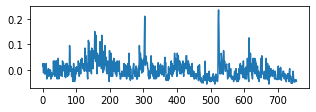

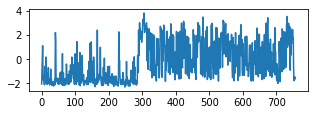

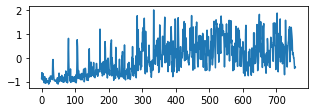

In [101]:
n_samples = 10
for i in range(n_samples):
    rticker = np.random.choice(tickers)
    df = pd.read_csv(f'{dirname}/{rticker}-ts.csv')
    TS = (df['High'] - df['Low']).values
    TS = np.arcsinh(TS - np.mean(TS))

    plt.figure(figsize=(5, 1.5))
    plt.plot(TS)